In [2]:
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152V2
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import shutil

In [4]:
base_path = "/content/drive/MyDrive/last data/new"
folders = os.listdir(base_path)
x = 0
for i in folders:
  print(i, len(os.listdir(os.path.join(base_path, i))))
  x+=len(os.listdir(os.path.join(base_path, i)))
print("Total Images: ", x)

rocket 558
fighter_jet 1726
helicopter 1361
passenger_plane 800
drone 1266
Total Images:  5711


In [5]:
if os.path.exists(r"/content/drive/MyDrive/dataset/train")==False:
  os.makedirs(r"/content/drive/MyDrive/dataset/train")
for i in os.listdir(base_path):
  if os.path.exists(r"/content/drive/MyDrive/dataset/train/%s"%i)==False:
    os.makedirs(r"/content/drive/MyDrive/dataset/train/%s"%(i))

if os.path.exists(r"/content/drive/MyDrive/dataset/val")==False:
  os.makedirs(r"/content/drive/MyDrive/dataset/val")
for i in os.listdir(base_path):
  if os.path.exists(r"/content/drive/MyDrive/dataset/val/%s"%(i))==False:    
    os.makedirs(r"/content/drive/MyDrive/dataset/val/%s"%(i))

In [6]:
#shutil.rmtree("/content/drive/MyDrive/dataset")

In [7]:
# folders = os.listdir(base_path)
# for i in folders:
#  train_len = round(len(os.listdir(os.path.join(base_path, i)))*0.8)
#  x = 0  
#  for j in os.listdir(r"%s/%s"%(base_path, i)):
#    if x<=train_len:
#      shutil.copy(r"%s/%s/%s"%(base_path, i,j), r"/content/drive/MyDrive/dataset/train/%s"%(i))
#      x+=1
#    else:
#      shutil.copy(r"%s/%s/%s"%(base_path, i,j), r"/content/drive/MyDrive/dataset/val/%s"%(i))



In [8]:
IMAGE_SIZE = [224, 224] # re-size all the images to this

train_path =  r"/content/drive/MyDrive/dataset/train" # train data path
valid_path =  r"/content/drive/MyDrive/dataset/val"  # test data path


In [9]:
# Here we will be using imagenet weights

inception = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234561536/234545216 [==============================] - 4s 0us/step


In [10]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [11]:
# useful for getting number of output classes
folders = glob(r"/content/drive/MyDrive/dataset/train/*")

In [12]:
# our layers 
x = Flatten()(inception.output)

In [13]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [14]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [15]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [16]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4574 images belonging to 5 classes.


In [18]:
test_set = test_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/val",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1137 images belonging to 5 classes.


In [19]:
#5711
4574+1137

5711

In [21]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
143/143 [==============================] - 576s 4s/step - loss: 3.0010 - accuracy: 0.8367 - val_loss: 3.3360 - val_accuracy: 0.8434
Epoch 2/20
143/143 [==============================] - 73s 513ms/step - loss: 2.0626 - accuracy: 0.8863 - val_loss: 3.9272 - val_accuracy: 0.8434
Epoch 3/20
143/143 [==============================] - 73s 510ms/step - loss: 1.5404 - accuracy: 0.9056 - val_loss: 3.6845 - val_accuracy: 0.8619
Epoch 4/20
143/143 [==============================] - 73s 510ms/step - loss: 1.4471 - accuracy: 0.9167 - val_loss: 4.7894 - val_accuracy: 0.8338
Epoch 5/20
143/143 [==============================] - 74s 514ms/step - loss: 1.2163 - accuracy: 0.9320 - val_loss: 3.8023 - val_accuracy: 0.8584
Epoch 6/20
143/143 [==============================] - 73s 512ms/step - loss: 1.1280 - accuracy: 0.9357 - val_loss: 4.3520 - val_accuracy: 0.8610
Epoch 7/20
143/143 [==============================] - 73s 511ms/step - loss: 1.1241 - accuracy: 0.9401 - val_loss: 6.0423 - val_accu

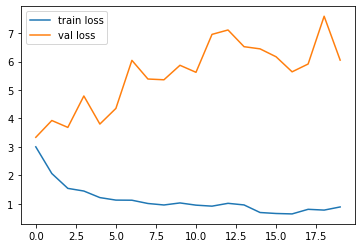

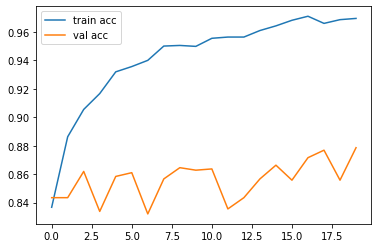

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/model_ResNet152V2.h5')

In [25]:
#Predicting the images

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [27]:
model = load_model(r"/content/drive/MyDrive/model_ResNet152V2.h5")

Enter path of your image:- /content/drive/MyDrive/dataset/train/drone/00000008.jpg
Input image is drone.


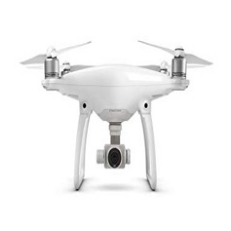

In [30]:
import cv2
img_size = 224
labels = ["drone","fighter_jet","helicopter","passenger_plane","rocket"]
image = input("Enter path of your image:- ")
image = cv2.imread(r"%s"%image)
image0 = cv2.resize(image, (224,224))
image = image0/255.0
image = image.reshape(-1, img_size, img_size, 3)
predict = model.predict(image)
predict = list(predict[0])
predict_name = labels[predict.index(max(predict))]
plt.imshow(image0)
plt.axis('off')
#cv2.waitKey()
#cv2.destroyAllWindows()
print("Input image is %s."%predict_name)